### Implement Linear regression to predict house prices using (i)Least squared method (ii) Normal equations. (use  homeprice_uni.csv)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid')

In [3]:
df = pd.read_excel('homeprices_uni.xlsx')
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [4]:
df.describe()

,area,price
count,5.000000,5.000000
mean,3280.000000,626000.000000
std,540.370243,74949.983322
min,2600.000000,550000.000000
25%,3000.000000,565000.000000
50%,3200.000000,610000.000000
75%,3600.000000,680000.000000
max,4000.000000,725000.000000


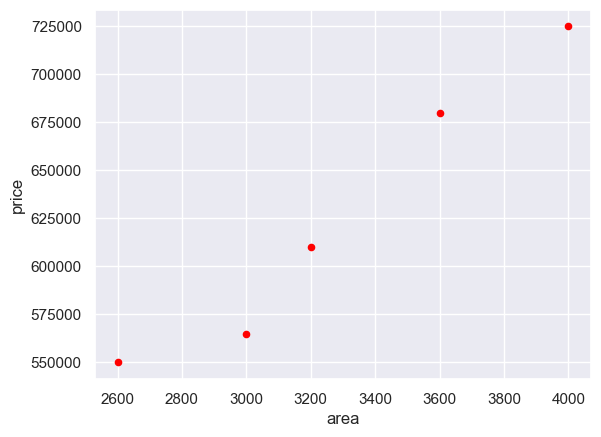

In [5]:
df.plot.scatter('area', 'price', color='red')
plt.show()

In [7]:
X_train = df.drop('price', axis=1)
y_train = df['price']

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
model.coef_

array([135.78767123])

In [10]:
model.intercept_

180616.43835616432

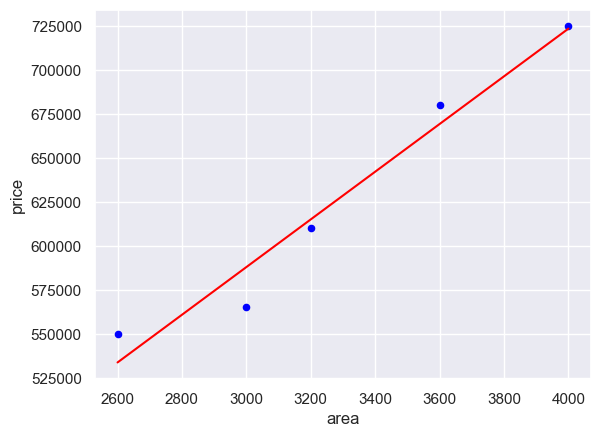

In [11]:
df.plot.scatter('area', 'price', color='blue')
plt.plot(
    np.array(df['area']),
    model.coef_[0] * np.array(df['area']) + model.intercept_,
    color='red'
)
plt.show()


In [12]:
test_df = pd.read_csv('https://github.com/codebasics/py/raw/master/ML/1_linear_reg/areas.csv')
test_df.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


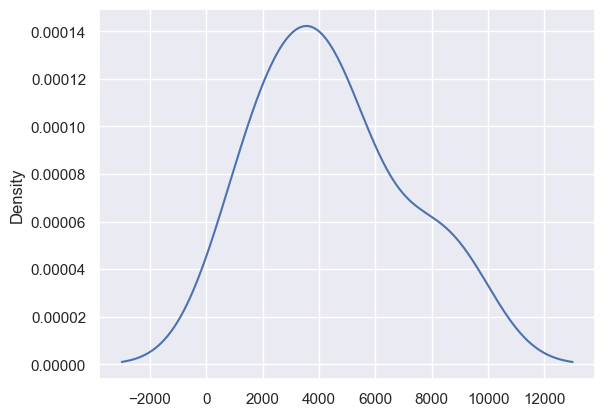

In [13]:
test_df['area'].plot.density()
plt.show()

In [14]:
test_df['price'] = model.predict(test_df)
test_df

,area,price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


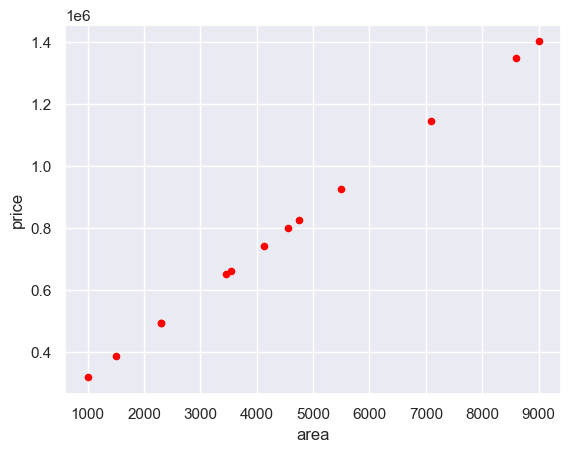

In [15]:
test_df.plot.scatter('area', 'price', color='red')
plt.show()

# Normal equations

In [16]:
import numpy as np

# Convert pandas DataFrame to numpy array
X = X_train.values
y = y_train.values

# Add a column of ones to X for the intercept term
X = np.c_[np.ones(X.shape[0]), X]

# Calculate the coefficients using the normal equation
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# Print the coefficients
print(theta)


[1.80616438e+05 1.35787671e+02]


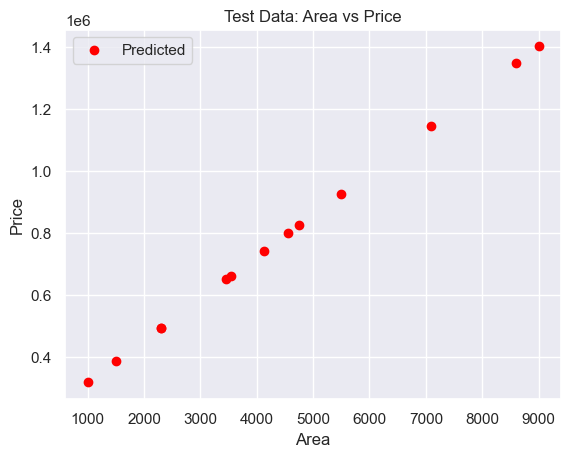

In [21]:
test_df = pd.read_csv('https://github.com/codebasics/py/raw/master/ML/1_linear_reg/areas.csv')

test_area = test_df['area']

# Add a column of ones to the 'area' column for the intercept term
test_X = np.c_[np.ones(test_area.shape[0]), test_area]

# Calculate the predicted prices using the normal equation coefficients
test_price = test_X.dot(theta)

# Create a new DataFrame with the 'area' and 'price' columns
test_result_df = pd.DataFrame({'area': test_area, 'price': test_price})

# Plot the test data points and the predicted prices
plt.scatter(test_result_df['area'], test_result_df['price'], color='red', label='Predicted')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Test Data: Area vs Price')
plt.legend()
plt.show()
